# Lista 3
## Jakub Zolich

In [294]:
"""IMPORTOWANIE BIBLIOTEK"""
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Zadanie 1

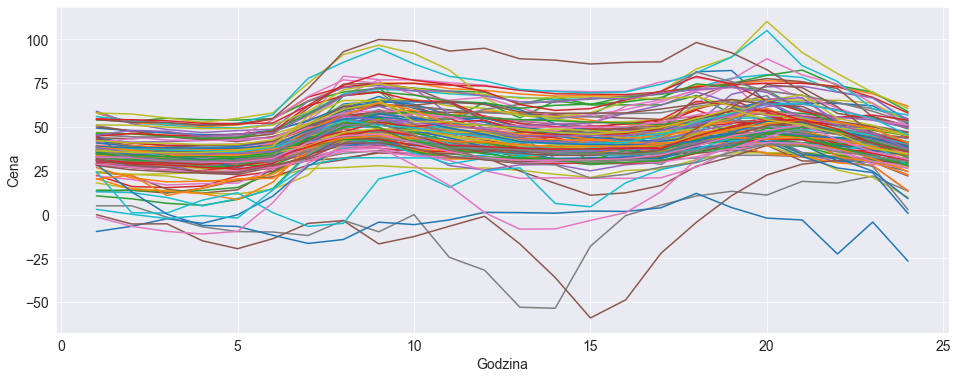

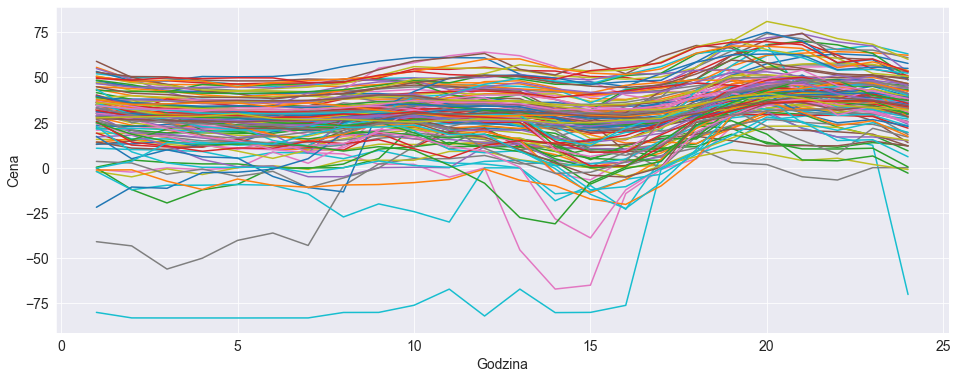

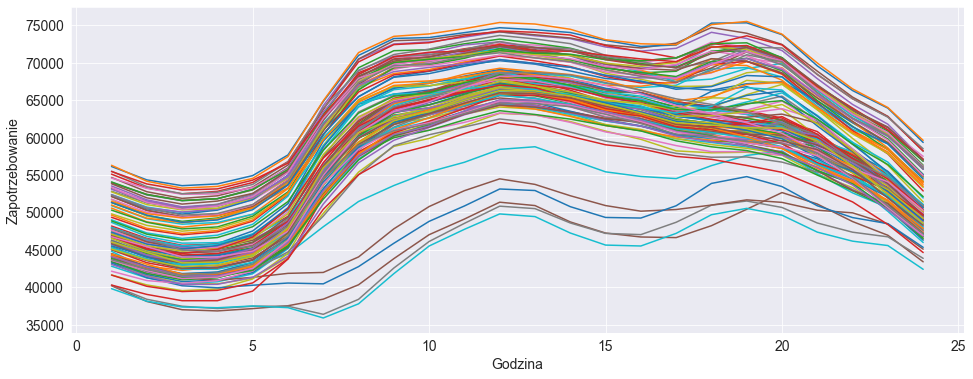

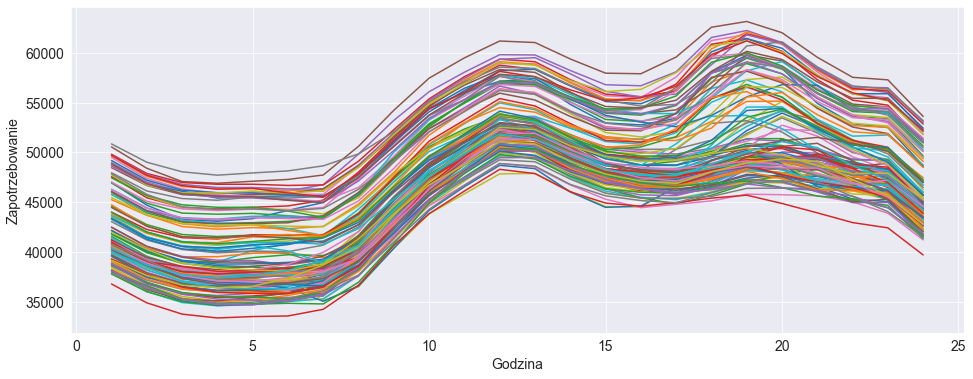

In [295]:
"""nordPole = pd.read_csv('NP2018.csv', header=None)"""

#######################################################################

def selectDayOfWeek(day:int):

    epex = pd.read_csv('EPEX.csv', header=None)
    epex_sel = epex.loc[epex[3] == day]
    return(epex_sel)


def getPriceForEachDay(day:int):

    dataNotGrupped = selectDayOfWeek(day)
    price = dataNotGrupped.groupby(0)[2].apply(list).tolist()
    return(price)

def plotWeekPriceChart(day:int):

    #X Axis
    hours = [hour for hour in range(1,25)]
    #Y Axis
    dayList = getPriceForEachDay(day)

    for list in dayList:
        plt.plot(hours, list)
    
    plt.xlabel('Godzina')
    plt.ylabel('Cena')

    plt.show()

plotWeekPriceChart(2)
plotWeekPriceChart(7)

########################################################################

def getValueForEachDay(day:int):

    dataNotGrupped = selectDayOfWeek(day)
    price = dataNotGrupped.groupby(0)[4].apply(list).tolist()
    return(price)

def plotValueChart(day:int):

    #X Axis
    hours = [hour for hour in range(1,25)]
    #Y Axis
    dayList = getValueForEachDay(day)

    for list in dayList:
        plt.plot(hours, list)
    
    plt.xlabel('Godzina')
    plt.ylabel('Zapotrzebowanie')
    plt.show()

plotValueChart(2)
plotValueChart(7)






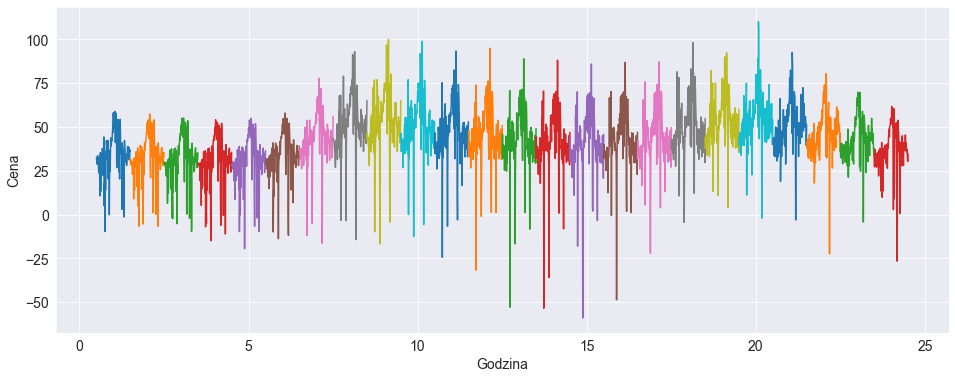

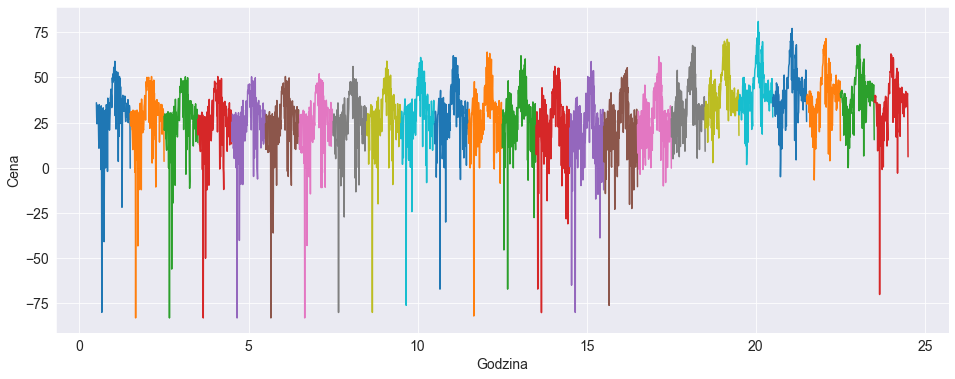

In [296]:
def selectHour(day:int, hour:int):

    epex_sel = selectDayOfWeek(day)
    epex_hour_price = epex_sel.loc[epex_sel[1] == hour]
    return epex_hour_price

def priceForAllHours(day:int):

    priceForAllHours = []

    for i in range(24):
        priceForHour = selectHour(day, i+1)[2].tolist()
        priceForAllHours.append(priceForHour)

    return priceForAllHours

def plotChart(day:int):

    _priceForAllHours = priceForAllHours(day)
    
    
    for i in range(24):
        plt.plot(np.linspace(i+0.5, i+1.5, len(_priceForAllHours[i])), _priceForAllHours[i])
    
    plt.xlabel('Godzina')
    plt.ylabel('Cena')

    plt.show()

plotChart(2)
plotChart(7)







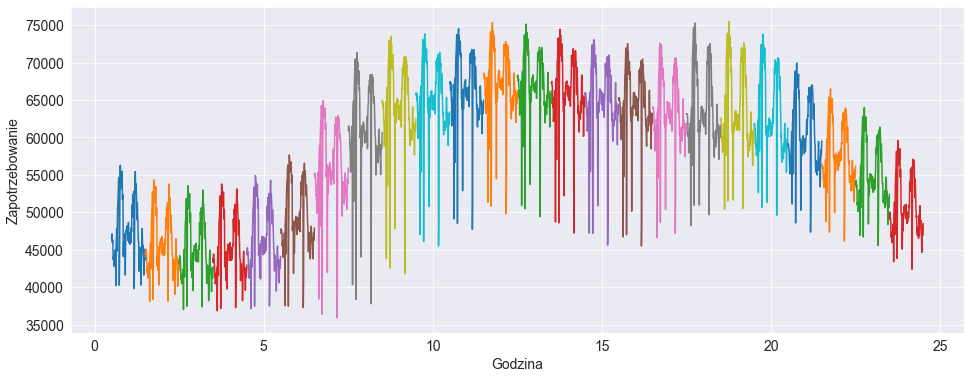

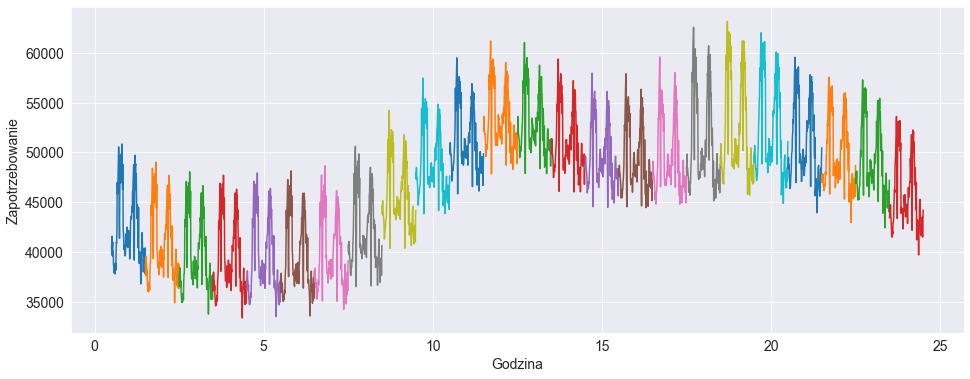

In [297]:
def selectHour(day:int, hour:int):

    epex_sel = selectDayOfWeek(day)
    epex_hour_price = epex_sel.loc[epex_sel[1] == hour]
    return epex_hour_price

def priceForAllHours(day:int):

    priceForAllHours = []

    for i in range(24):
        priceForHour = selectHour(day, i+1)[4].tolist()
        priceForAllHours.append(priceForHour)

    return priceForAllHours

def plotChart(day:int):

    _priceForAllHours = priceForAllHours(day)
    
    
    for i in range(24):
        plt.plot(np.linspace(i+0.5, i+1.5, len(_priceForAllHours[i])), _priceForAllHours[i])
    
    plt.xlabel('Godzina')
    plt.ylabel('Zapotrzebowanie')
    
    plt.show()

plotChart(2)
plotChart(7)

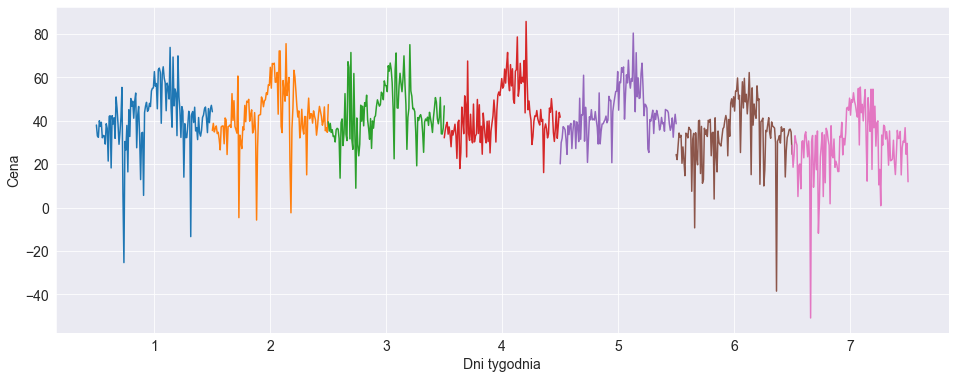

In [298]:
#CENA
def getMeanForDay(day:int):

    epex = selectDayOfWeek(day)
    meanArr = epex.groupby(0)[2].apply(list).tolist()

    meanArr = [sum(x)/len(x) for x in meanArr]



    return meanArr



def plotChart():

    weeks = [getMeanForDay(x+1) for x in range(7)]

    for i in range(7):
        plt.plot(np.linspace(i+0.5, i+1.5, len(weeks[i])), weeks[i])

    plt.xlabel('Dni tygodnia')
    plt.ylabel('Cena')

plotChart()



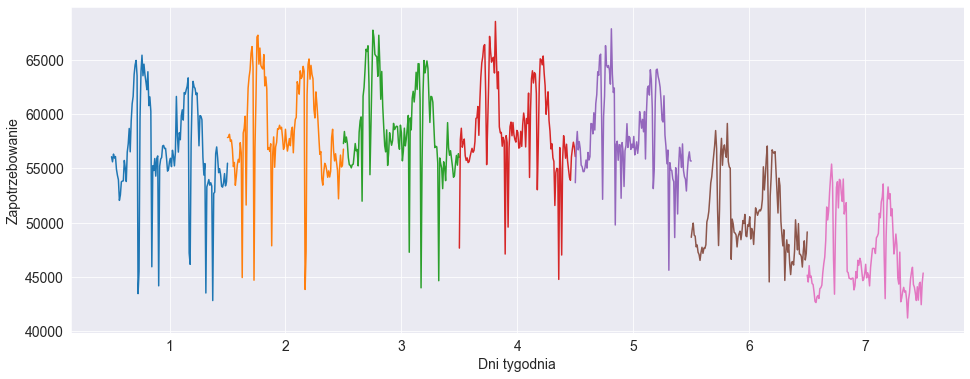

In [299]:
#ZAPOTRZEBOWANIE
def getMeanForDay(day:int):

    epex = selectDayOfWeek(day)
    meanArr = epex.groupby(0)[4].apply(list).tolist()

    meanArr = [sum(x)/len(x) for x in meanArr]

    return meanArr

def plotChart():

    weeks = [getMeanForDay(x+1) for x in range(7)]

    for i in range(7):
        plt.plot(np.linspace(i+0.5, i+1.5, len(weeks[i])), weeks[i])
    
    plt.xlabel('Dni tygodnia')
    plt.ylabel('Zapotrzebowanie')
    plt.show()

plotChart()

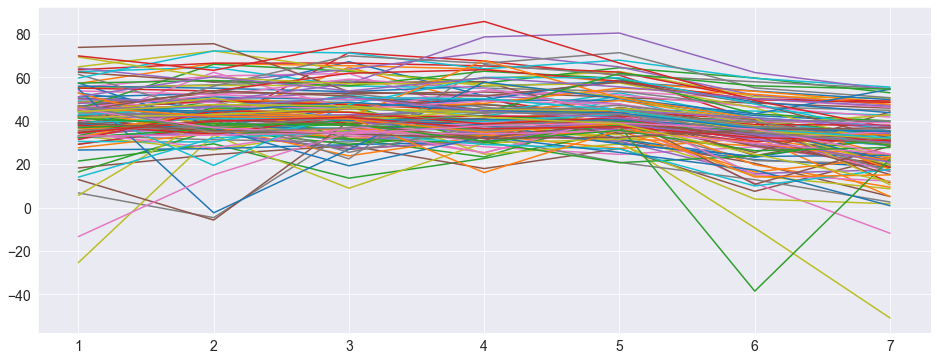

In [300]:
def getMeanForDay():

    epex = pd.read_csv('EPEX.csv', header=None)
    meanArr = epex.groupby(0)[2].mean()
    meanArr = meanArr.values.tolist()
    return meanArr


def weekSeasonal():
    epex_mean = getMeanForDay()
    weeks = []
    temp = []

    for i in range(len(epex_mean)-4):
        temp.append(epex_mean[i+4])
        if ((i+1) % 7) == 0:
            weeks.append(temp)
            temp = []

    return weeks

def plotChart():
    weeks = weekSeasonal()

    hours = [x for x in range(1,8)]

    for i in range(len(weeks)):
        plt.plot(hours, weeks[i])
    plt.show()

plotChart()


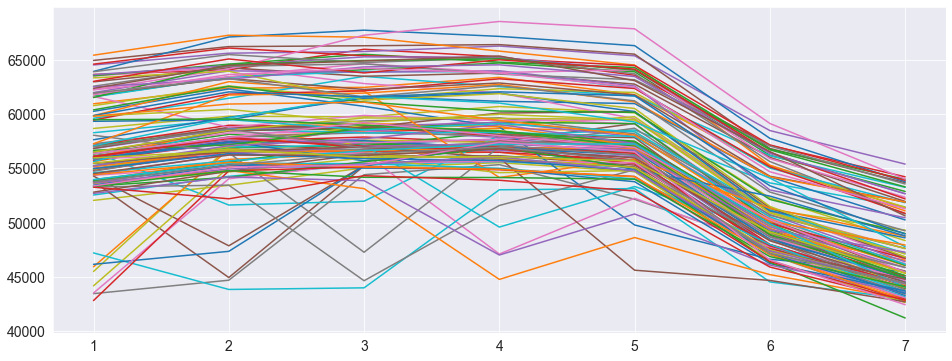

In [301]:
def getMeanForDay():

    epex = pd.read_csv('EPEX.csv', header=None)
    meanArr = epex.groupby(0)[4].mean()
    meanArr = meanArr.values.tolist()
    return meanArr


def weekSeasonal():
    epex_mean = getMeanForDay()
    weeks = []
    temp = []

    for i in range(len(epex_mean)-4):
        temp.append(epex_mean[i+4])
        if ((i+1) % 7) == 0:
            weeks.append(temp)
            temp = []

    return weeks

def plotChart():
    weeks = weekSeasonal()

    hours = [x for x in range(1,8)]

    for i in range(len(weeks)):
        plt.plot(hours, weeks[i])
    plt.show()

plotChart()

### Zadanie 2

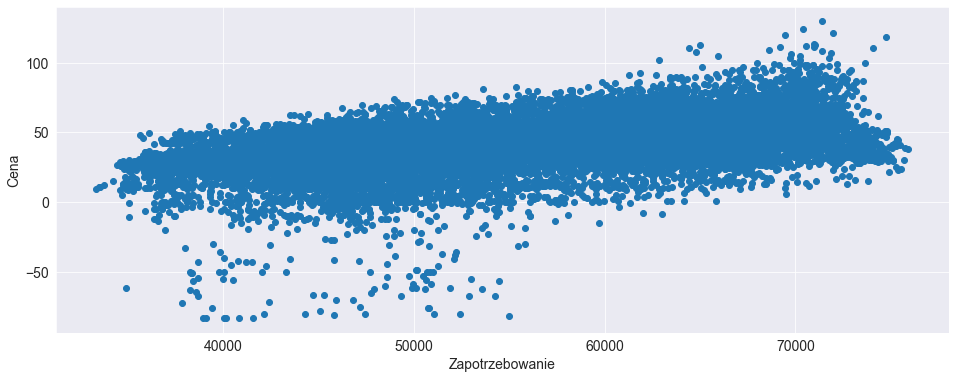

In [302]:
def getDay():
    epex = pd.read_csv('EPEX.csv', header=None)
    epex_prices = epex.groupby(0)[2].apply(list).tolist()
    epex_demand = epex.groupby(0)[4].apply(list).tolist()

    return epex_prices, epex_demand

def plotChart():
    epex_p,epex_d = getDay()
    

    plt.scatter(epex_d, epex_p)
    plt.xlabel("Zapotrzebowanie")
    plt.ylabel("Cena")
    
    plt.show()

plotChart()

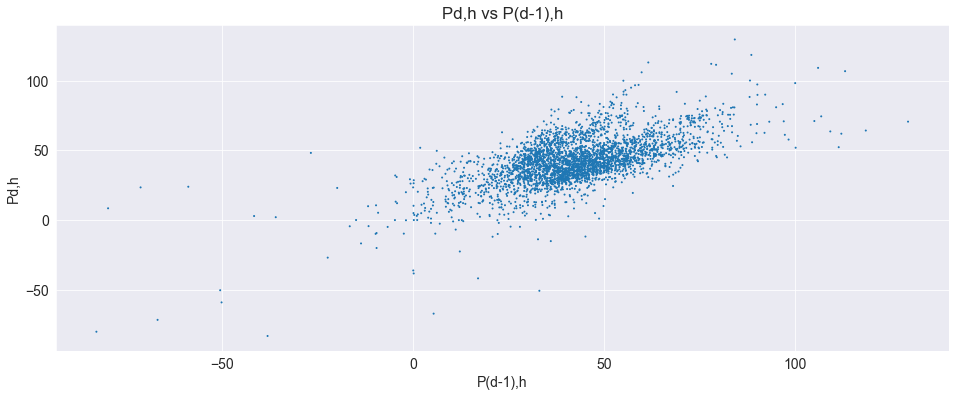

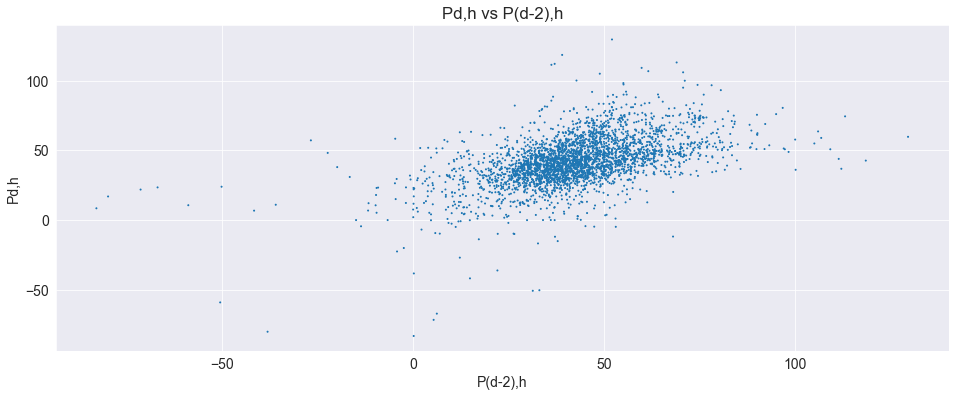

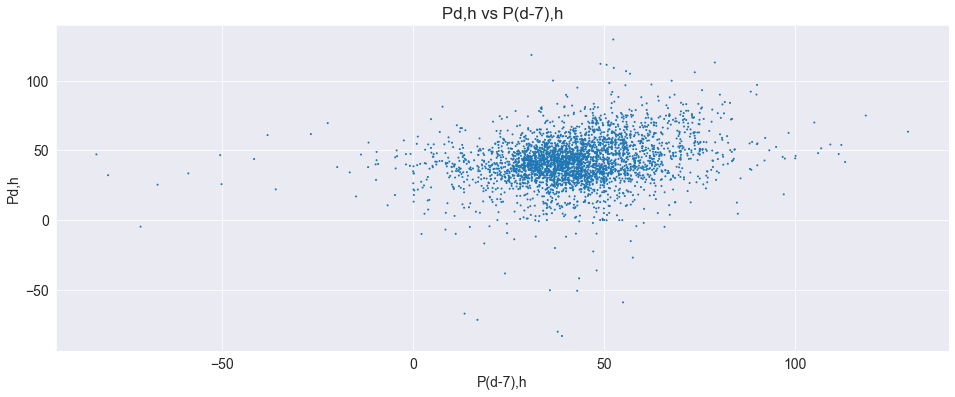

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as dat


data = pd.read_csv("EPEX.csv", ',', header=None, names=['YYYYMMDD', 'HH', 'zon_p', 'day_week','load_forecast'], usecols=[0,1,2,3,4])

def pdk(data, k):
    points = []
    for n in range(len(data.zon_p) - k):
        points.append([data.zon_p[n + k], data.zon_p[n]])
    points = np.array(points)
    plt.scatter(points[:, 1],points[:, 0], s=[1 for n in range(len(points[:, 0]))])
    plt.title('Pd,h vs P(d-%i),h' %k)
    plt.xlabel('P(d-%i),h'%k)
    plt.ylabel('Pd,h')
    plt.show()

ymdhw = []
for i in range(len(data.YYYYMMDD)):
    a = (int(dat.datetime.strptime(str(int(data.YYYYMMDD[i])), '%Y%m%d').strftime('%Y')))
    b = (int(dat.datetime.strptime(str(int(data.YYYYMMDD[i])), '%Y%m%d').strftime('%m')))
    c = (int(dat.datetime.strptime(str(int(data.YYYYMMDD[i])), '%Y%m%d').strftime('%d')))
    d = (int(data.HH[i]))
    ymdhw.append(pd.Timestamp.date(dat.datetime(a, b, c)))
ymdhw = np.array(ymdhw)
ymdhw = pd.DataFrame({'datetime': ymdhw})
df = pd.concat([ymdhw, data], 1)



dx = df[df['HH'].isin(np.array([6,9,18,22]))].reset_index()
pdk(dx, 1)
pdk(dx, 2)
pdk(dx, 7)


### Zadanie 3

In [304]:
epex = pd.read_csv('EPEX.csv', header=None)
data = epex.groupby(1)[2].appy(list).tolist()

hours = 

SyntaxError: invalid syntax (<ipython-input-304-ef53f40498bf>, line 4)

### Zadanie 4

In [ ]:
def getPricesForDay():
    epex = pd.read_csv('EPEX.csv', header=None)
    epex_prices = epex.groupby(0)[2].apply(list).tolist()

    return epex_prices

def checkDay(day:int):

    epex = pd.read_csv('EPEX.csv', header=None)
    epex_day = epex.groupby(3)[0].apply(list).tolist()
    
    for i in range(len(epex_day)):
        for j in range(len(epex_day[i])):
            if epex_day[i][j] == day:
                return i + 1
    
    return 0 

def prediction():
    
    epex_p = getPricesForDay()

    for i in range(359, len(epex_p)):

        

        if day == 6 or 7 or 1:
            pass
        else:
            pass










In [ ]:
import datetime as dat
import pandas as pd
import numpy as np


naivedata = pd.read_csv("EPEX.csv",header=None,skiprows=353*24, nrows=24*483)

ym = []

for i in range(len(naivedata[0])):
    a = (int(dat.datetime.strptime(str(int(naivedata[0][i])), '%Y%m%d').strftime('%Y')))
    b = (int(dat.datetime.strptime(str(int(naivedata[0][i])), '%Y%m%d').strftime('%m')))
    c = (int(dat.datetime.strptime(str(int(naivedata[0][i])), '%Y%m%d').strftime('%d')))
    ym.append(pd.Timestamp.date(dat.datetime(a, b, c)))
ym = pd.DataFrame({'datetime': np.array(ym)})
dd = pd.concat([ym, naivedata], 1)
dd['naive'] = np.array(len(dd[1]))
print(dd)

for i in range(24*7, len(dd)):
    if dd.loc[i,3] == 1 or dd.loc[i,3] == 6 or dd.loc[i,3] ==  7 :
        dd._set_value(i,'naive',float(dd.loc[dd['datetime'].eq(dd.loc[i, 'datetime'] - dat.timedelta(days=7)) & dd[1].eq(dd.loc[i, 1])][2]))
    else:
        dd._set_value(i, 'naive',float(dd.loc[dd['datetime'].eq(dd.loc[i, 'datetime'] - dat.timedelta(days=1)) & dd[1].eq(dd.loc[i, 1])][2]))

print(dd)

         datetime         0   1      2  3         4  naive
0      2018-06-03  20180603   1  39.36  7  41787.75  11592
1      2018-06-03  20180603   2  35.50  7  40101.25  11592
2      2018-06-03  20180603   3  33.98  7  39060.00  11592
3      2018-06-03  20180603   4  33.09  7  38612.25  11592
4      2018-06-03  20180603   5  30.97  7  38503.75  11592
...           ...       ...  ..    ... ..       ...    ...
11587  2019-09-28  20190928  20  43.69  6  52940.00  11592
11588  2019-09-28  20190928  21  33.85  6  51252.25  11592
11589  2019-09-28  20190928  22  26.70  6  48458.50  11592
11590  2019-09-28  20190928  23  24.08  6  46449.50  11592
11591  2019-09-28  20190928  24  19.90  6  43630.75  11592

[11592 rows x 7 columns]
         datetime         0   1      2  3         4  naive
0      2018-06-03  20180603   1  39.36  7  41787.75  11592
1      2018-06-03  20180603   2  35.50  7  40101.25  11592
2      2018-06-03  20180603   3  33.98  7  39060.00  11592
3      2018-06-03  20180603   

### Zadanie 5

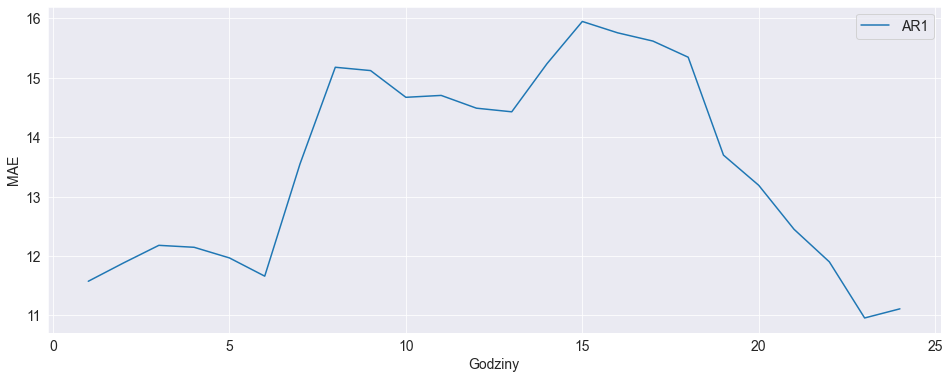

Średni błąd MAE dla AR1: 13.53


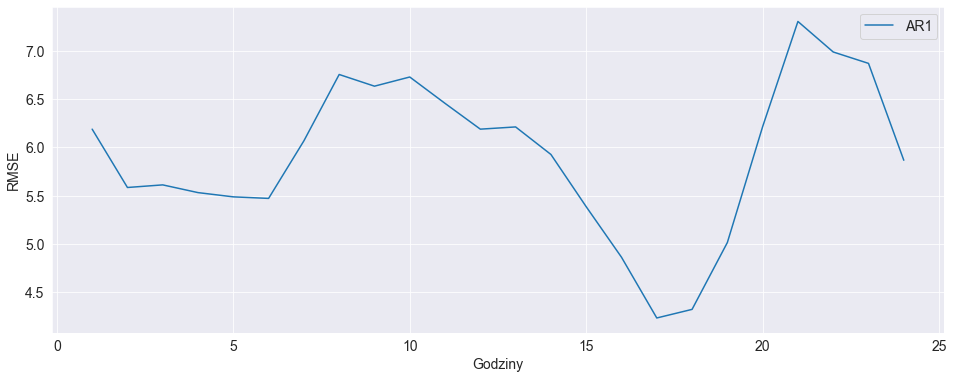

Średni błąd RMSE dla AR1: 5.91


In [ ]:
from sklearn.linear_model import LinearRegression
from statistics import mean

# epex = pd.read_csv('EPEX.csv', header=None)

# epex[5] = epex[2].shift()

# epex.drop(0, axis=1, inplace= True)
# epex.drop(3, axis=1, inplace= True)
# epex.drop(4, axis=1, inplace= True)

# epex.at[0,5] = 0

# y = epex[2].values
# x = epex[5].values

# train_size = 360

# x_train, x_test = x[0:train_size*24], x[train_size*24:len(x)]
# y_train, y_test = y[0:train_size*24], y[train_size*24:len(x)]

# x_train = x_train.reshape(-1, 1)
# x_test = x_test.reshape(-1, 1)

# lr = LinearRegression()
# lr.fit(x_train, y_train)


# print(lr.coef_)
# print(lr.intercept_)

# y_pred = lr.predict(x_test)

# plt.plot(y_test[360*24:], label = "Actual Values")
# plt.plot(y_pred[360*24:], label = "Actual Values")
# plt.legend()
# plt.show()


epex = pd.read_csv('EPEX.csv', header=None)

df = []

for i in range(24):
    df.append(epex.loc[epex[1] == (i+1)])


MAE_h1 = []
RMSE_h1 = []
for i in range(24):

    epex = df[i]

    epex[5] = epex[2].shift()

    #epex[5] = epex[2]

    epex.drop(0, axis=1, inplace= True)
    epex.drop(3, axis=1, inplace= True)
    epex.drop(4, axis=1, inplace= True)

    

    y = epex[2].values
    x = epex[5].values

    x[0] = 0

    train_size = 360

    x_train, x_test = x[0:train_size], x[train_size:len(x)]
    y_train, y_test = y[0:train_size], y[train_size:len(x)]

    x_train = x_train.reshape(-1, 1)
    x_test = x_test.reshape(-1, 1)

    lr = LinearRegression()
    lr.fit(x_train, y_train)


    # print(lr.coef_)
    # print(lr.intercept_)

    y_pred = lr.predict(x_test)

    err = x_test - y_pred

    MAE = round(np.mean(np.abs(err)), 3)
    RMSE = round(np.sqrt(np.mean(err) ** 2), 3)

    MAE_h1.append(MAE)
    RMSE_h1.append(RMSE)
    


hours = [h for h in range(1,25)]
plt.plot(hours, MAE_h1, label="AR1")
plt.ylabel("MAE")
plt.xlabel("Godziny")
plt.legend()
plt.show()
print(f"Średni błąd MAE dla AR1: {round(mean(MAE_h1), 2)}")

plt.plot(hours, RMSE_h1, label="AR1")
plt.ylabel("RMSE")
plt.xlabel("Godziny")
plt.legend()
plt.show()
print(f"Średni błąd RMSE dla AR1: {round(mean(RMSE_h1), 2)}")

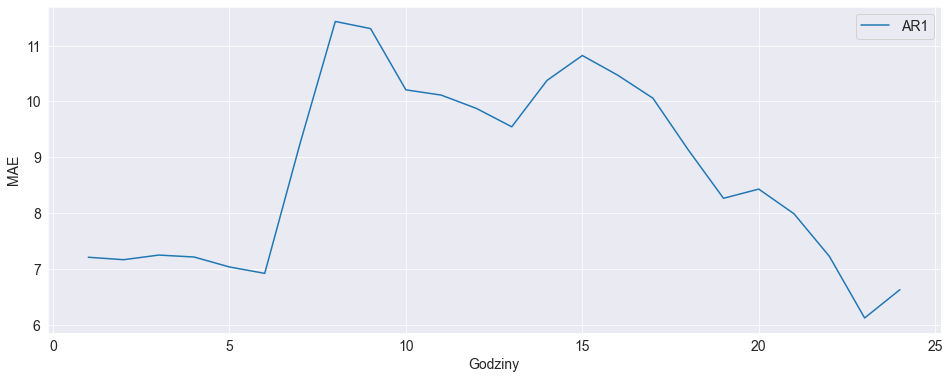

Średni błąd MAE dla AR1: 8.75


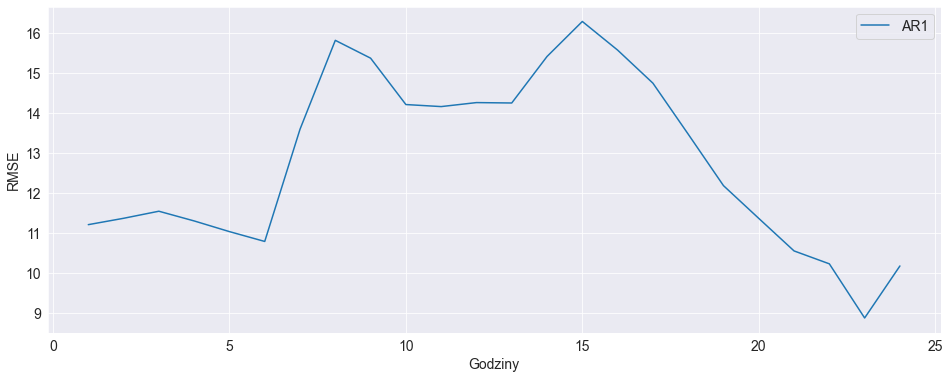

Średni błąd RMSE dla AR1: 12.82


In [332]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

epex = pd.read_csv('EPEX.csv', header=None)

dataSet = epex.groupby(1)[2].apply(list).tolist()


MAE_h1 = []
RMSE_h1 = []
for i in range(24):

    train_sample = 360

    data = dataSet[i]

    train_data, test_data = data[0:train_sample], data[train_sample:len(data)]

    res = AutoReg(data, hold_back=360, lags=1, old_names=False).fit()

    prices_predicted = res.predict()

    err = test_data - prices_predicted

    MAE = round(np.mean(np.abs(err)), 3)
    RMSE = round(np.sqrt(np.mean(err ** 2)), 3)
    
    
    MAE_h1.append(MAE)
    RMSE_h1.append(RMSE)


hours = [h for h in range(1,25)]
plt.plot(hours, MAE_h1, label="AR1")
plt.ylabel("MAE")
plt.xlabel("Godziny")
plt.legend()
plt.show()
print(f"Średni błąd MAE dla AR1: {round(mean(MAE_h1), 2)}")

plt.plot(hours, RMSE_h1, label="AR1")
plt.ylabel("RMSE")
plt.xlabel("Godziny")
plt.legend()
plt.show()
print(f"Średni błąd RMSE dla AR1: {round(mean(RMSE_h1), 2)}")
    


### ZAD 6

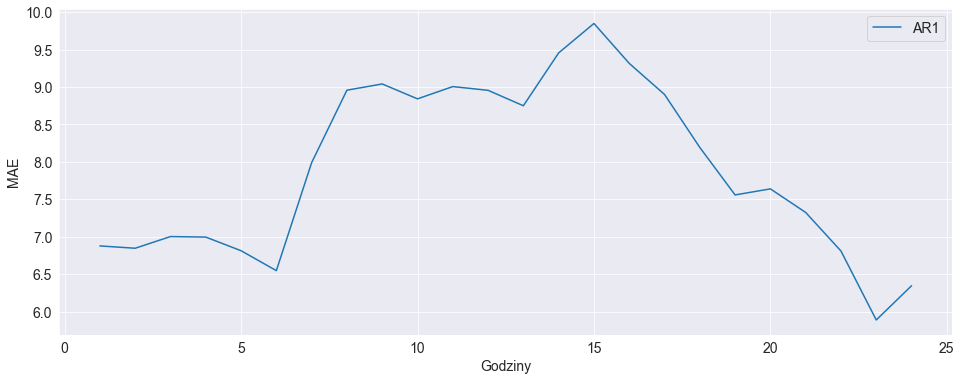

Średni błąd MAE dla AR1: 7.91


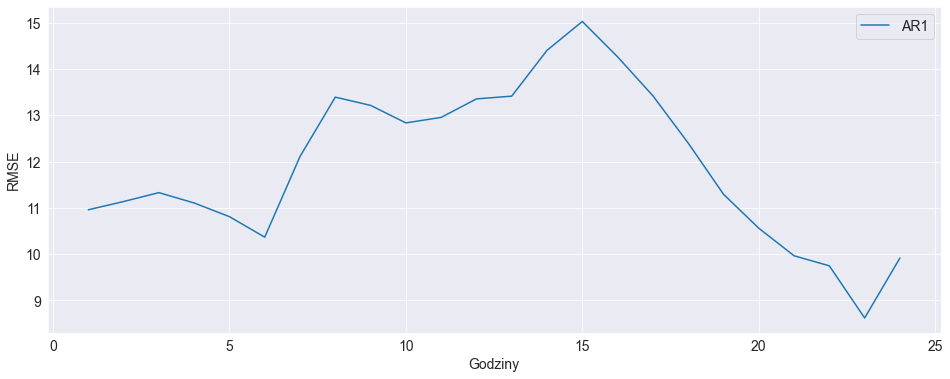

Średni błąd RMSE dla AR1: 11.94


In [331]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

epex = pd.read_csv('EPEX.csv', header=None)

dataSet = epex.groupby(1)[2].apply(list).tolist()


MAE_h1 = []
RMSE_h1 = []
for i in range(24):

    train_sample = 360

    data = dataSet[i]

    train_data, test_data = data[0:train_sample], data[train_sample:len(data)]

    res = AutoReg(data, hold_back=360, lags=[1,2,7], old_names=False).fit()

    prices_predicted = res.predict()

    err = test_data - prices_predicted

    MAE = round(np.mean(np.abs(err)), 3)
    RMSE = round(np.sqrt(np.mean(err ** 2)), 3)
    
    
    MAE_h1.append(MAE)
    RMSE_h1.append(RMSE)


hours = [h for h in range(1,25)]
plt.plot(hours, MAE_h1, label="AR1")
plt.ylabel("MAE")
plt.xlabel("Godziny")
plt.legend()
plt.show()
print(f"Średni błąd MAE dla AR1: {round(mean(MAE_h1), 2)}")

plt.plot(hours, RMSE_h1, label="AR1")
plt.ylabel("RMSE")
plt.xlabel("Godziny")
plt.legend()
plt.show()
print(f"Średni błąd RMSE dla AR1: {round(mean(RMSE_h1), 2)}")
    


### Zadanie 7

In [330]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

epex = pd.read_csv('EPEX.csv', header=None)

dataSet = epex.groupby(1)[2].apply(list).tolist()

minimal_price = []
for j in range(len(dataSet)):
    minimal_price.append( min(dataSet[j]) )

last_price = []
for k in range(len(dataSet)):
    last_price.append( dataSet[-1] )


MAE_h1 = []
RMSE_h1 = []
for i in range(24):

    print(minimal_price)

    train_sample = 360

    data = dataSet[i]

    train_data, test_data = data[0:train_sample], data[train_sample:len(data)]

    res = AutoReg(data, hold_back=360, lags=1, exog=minimal_price, old_names=False).fit()

    prices_predicted = res.predict()

    err = test_data - prices_predicted

    MAE = round(np.mean(np.abs(err)), 3)
    RMSE = round(np.sqrt(np.mean(err) ** 2), 3)
    
    
    MAE_h1.append(MAE)
    RMSE_h1.append(RMSE)


hours = [h for h in range(1,25)]
plt.plot(hours, MAE_h1, label="AR1")
plt.ylabel("MAE")
plt.xlabel("Godziny")
plt.legend()
plt.show()
print(f"Średni błąd MAE dla AR1: {round(mean(MAE_h1), 2)}")

plt.plot(hours, RMSE_h1, label="AR1")
plt.ylabel("RMSE")
plt.xlabel("Godziny")
plt.legend()
plt.show()
print(f"Średni błąd RMSE dla AR1: {round(mean(RMSE_h1), 2)}")
    


[-79.94, -83.0, -83.03, -83.03, -83.04, -83.02, -83.01, -80.0, -79.96, -76.02, -67.08, -81.95, -67.07, -80.07, -80.69, -77.82, -66.8, -58.95, -49.0, -1.97, -4.94, -38.19, -49.98, -70.09]


ValueError: endog and exog matrices are different sizes